In [95]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Графики функции выплат

Пример 1. Постройте графики функции выплат для опционов колл (покупка, продажа) и пут (покупка, продажа).

In [16]:
def payoff_buy_call(S, K):
    return np.maximum(S - K, 0)

def payoff_buy_put(S, K):
    return np.maximum(K - S, 0)

def payoff_sell_call(S, K):
    return -payoff_buy_call(S, K)

def payoff_sell_put(S, K):
    return -payoff_buy_put(S, K)

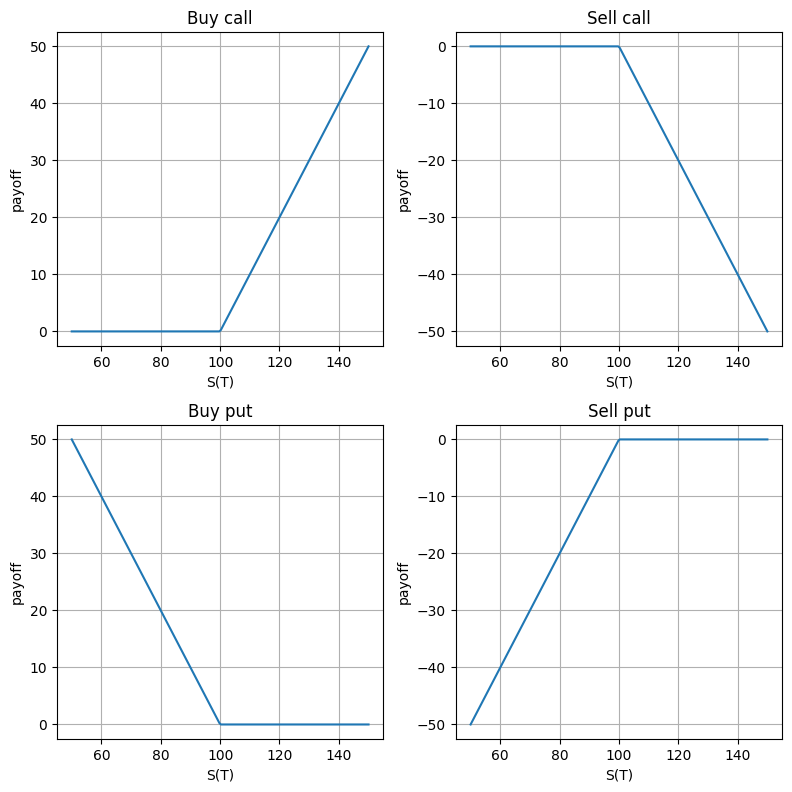

In [17]:
K = 100
S = np.linspace(50, 150, 200)

fig, ax = plt.subplots(2, 2, figsize = (8,8))
ax[0][0].plot(S, payoff_buy_call(S, K))
ax[0][0].set_xlabel("S(T)")
ax[0][0].set_ylabel("payoff")
ax[0][0].grid(True)
ax[0][0].set_title("Buy call")

ax[0][1].plot(S, payoff_sell_call(S, K))
ax[0][1].set_xlabel("S(T)")
ax[0][1].set_ylabel("payoff")
ax[0][1].grid(True)
ax[0][1].set_title("Sell call")

ax[1][0].plot(S, payoff_buy_put(S, K))
ax[1][0].set_xlabel("S(T)")
ax[1][0].set_ylabel("payoff")
ax[1][0].grid(True)
ax[1][0].set_title("Buy put")

ax[1][1].plot(S, payoff_sell_put(S, K))
ax[1][1].set_xlabel("S(T)")
ax[1][1].set_ylabel("payoff")
ax[1][1].grid(True)
ax[1][1].set_title("Sell put")

fig.tight_layout(pad=1.0)

## Задача (Collar)

  Допустим, что текущая цена базового актива равна 70.65, страйки опциона пут и колл равны 65 и 75 соответственно, а оценки их стоимости (премии) равны 2 и 3.25 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и продаже опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/collar-options-trading-strategy-python/


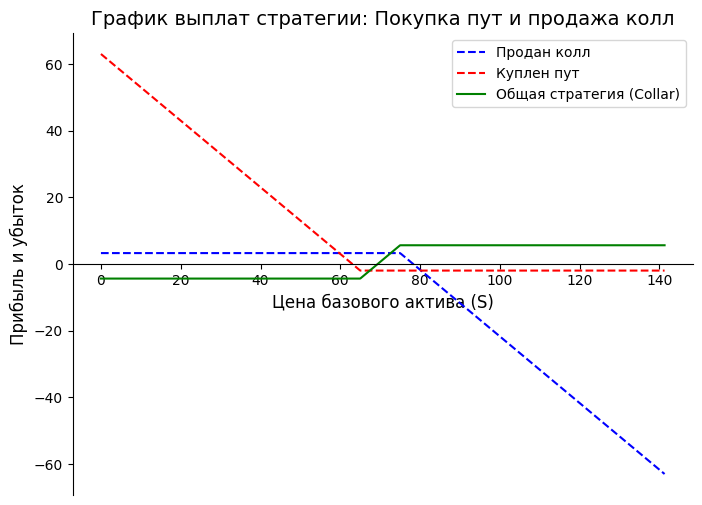

Максимальная прибыль: 66.25
Максимальный убыток: -65.05000000000001


In [30]:
spot_price = 70.65          
strike_price_long_put = 65    
premium_long_put = 2           
strike_price_short_call = 75   
premium_short_call = 3.25     


sT = np.linspace(0, 2 * spot_price, 1000)


payoff_short_call = payoff_sell_call(sT, strike_price_short_call) + premium_short_call
payoff_long_put = payoff_buy_put(sT, strike_price_long_put) - premium_long_put
payoff_collar = payoff_short_call + payoff_long_put


fig, ax = plt.subplots(figsize=(8, 6))


ax.spines['top'].set_visible(False)   
ax.spines['right'].set_visible(False)  
ax.spines['bottom'].set_position('zero')  


ax.plot(sT, payoff_short_call, '--', label='Продан колл', color='blue')
ax.plot(sT, payoff_long_put, '--', label='Куплен пут', color='red')
ax.plot(sT, payoff_collar+sT-spot_price, label='Общая стратегия (Collar)', color='green') 

plt.xlabel('Цена базового актива (S)', fontsize=12)
plt.ylabel('Прибыль и убыток', fontsize=12)
plt.title('График выплат стратегии: Покупка пут и продажа колл', fontsize=14)
plt.legend()

plt.show()

print("Максимальная прибыль:", max(payoff_collar))
print("Максимальный убыток:", min(payoff_collar))


## Задача (Long Straddle)

Допустим, что текущая цена базового актива равна 172.5, страйки опциона пут и колл однинаковые и равны 200, а премии опционов равны 29.25 и 0.04 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и покупке опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/straddle-options-trading-strategy-python/

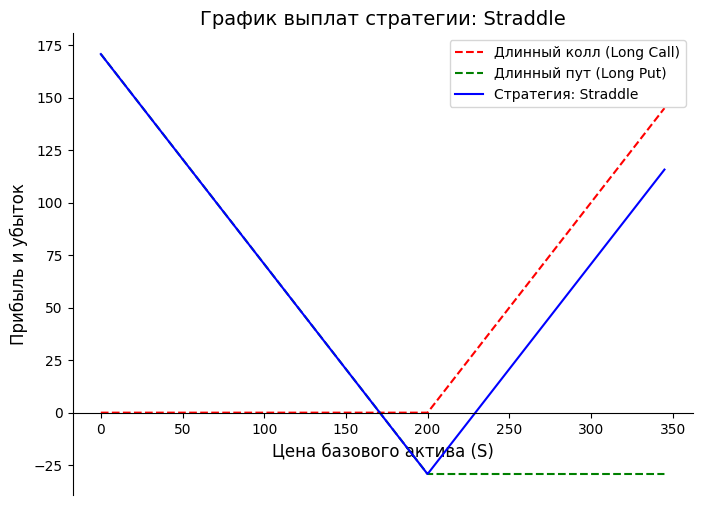

Максимальная прибыль: Неограниченная (Unlimited)
Максимальный убыток: -29.244954954954956


In [32]:
spot_price = 172.5           # Текущая цена базового актива
strike_price_long_put = 200   # Страйк опциона пут
premium_long_put = 29.25      # Премия за покупку опциона пут
strike_price_long_call = 200  # Страйк опциона колл
premium_long_call = 0.04      # Премия за покупку опциона колл


sT = np.linspace(0, 2 * spot_price, 1000)

payoff_long_call = payoff_buy_call(sT, strike_price_long_call) - premium_long_call
payoff_long_put = payoff_buy_put(sT, strike_price_long_put) - premium_long_put

payoff_straddle = payoff_long_call + payoff_long_put

fig, ax = plt.subplots(figsize=(8, 6))

ax.spines['top'].set_visible(False)   
ax.spines['right'].set_visible(False) 
ax.spines['bottom'].set_position('zero')  

ax.plot(sT, payoff_long_call, '--', label='Длинный колл (Long Call)', color='r')
ax.plot(sT, payoff_long_put, '--', label='Длинный пут (Long Put)', color='g')
ax.plot(sT, payoff_straddle, label='Стратегия: Straddle', color='b')

plt.xlabel('Цена базового актива (S)', fontsize=12)
plt.ylabel('Прибыль и убыток', fontsize=12)
plt.title('График выплат стратегии: Straddle', fontsize=14)
plt.legend()
plt.show()


print("Максимальная прибыль: Неограниченная (Unlimited)")
print("Максимальный убыток:", min(payoff_straddle))

# Биноминальная модель

In [ ]:
# plot_binomial_tree: visualisation of the tree and state prices
def plot_binomial_tree(statePrices):
    for i in range(0,n+1):
        for j in range(0,n+1):
            if j>i:
                break
            if i<n:
                x1, y1 = [i, i+1], [2*j-(i-1),2*j+1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="red")
                x1, y1 = [i, i+1], [2*j-(i-1),2*j-1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="black")
            plt.text(i-0.2,2*j-(i-1)-0.6,"%.2f" % statePrices["payoff"][i][j])
            plt.text(i-0.2,2*j-(i-1)-1.0,"%.2f" % statePrices["underlying"][i][j],color="blue")
    plt.title("Биноминальное дерево")
    plt.xlabel("p=%.1f%%, u=%.3f, r=%.2f%%, q=%.2f%%, dt=%.2fdays" % (statePrices["p"]*100,
                                                                   statePrices["u"],
                                                                   statePrices["r"]*100,
                                                                   statePrices["q"]*100,
                                                                   statePrices["dt"]*365))
    plt.show()

In [ ]:
# binomial_tree_pricer

def binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=True, showStatePrices=False):
# r: risk neutral rate
# q: dividend yield
# sigma: volatility
# T: maturity in years
# n: number of time steps
# S: spot stock price
# payoff: payoff function e.g.: lambda S: max(S-K,0)
# american: early exercise: True if american, otherwise European
# showStatePrices: print tree probabilities and state prices

    dt = T/n
    up  = np.exp(sigma*np.sqrt(dt))
    p0 = (up * np.exp((r-q) * dt) - 1) / (up**2 - 1)
    p1 = 1 - p0
    df = np.exp(-r * dt)
    # initial values at time T
    statePrices = {"p":p0, "u":up, "r":r, "q":q, "dt":dt}
    if showStatePrices:
        statePrices["payoff"]=np.zeros((n+1,n+1))
        statePrices["underlying"]=np.zeros((n+1,n+1))
    p = np.zeros(n+1)
    for i in range(n+1): # i from 0 to n incl
        p[i] = payoff(S * up**(2*i - n))
        if showStatePrices:
            statePrices["payoff"][n][i] = p[i]
            statePrices["underlying"][n][i] = S * up**(2*i - n)
    # move to earlier times
    for j in range(n-1,-1,-1): # j from n-1 to 0 incl
        for i in range(j+1): # i from 0 to j incl
            # discounted expected value of exdiv price
            p[i] = (p0 * p[i+1] + p1 * p[i])*df
            # american payoff
            if american:
                early_exercise = payoff(S * up**(2*i - j))
                p[i] = max(early_exercise,p[i])
            if showStatePrices:
                statePrices["payoff"][j][i] = p[i]
                statePrices["underlying"][j][i] = S * up**(2*i - j)
    if showStatePrices:
        plot_binomial_tree(statePrices)
    return p[0]

Пример. Текущая цена акций равна 50, волатильность 15%, цена страйк на 1% выше цены базового актива, время до экспирации 1 месяц, безрисковая ставка 5%, на акции начисляются дивиденды 2%. Постройте биноминальное дерево на 5 периодов для европейского опциона пут и оцените его стоимость.

Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)


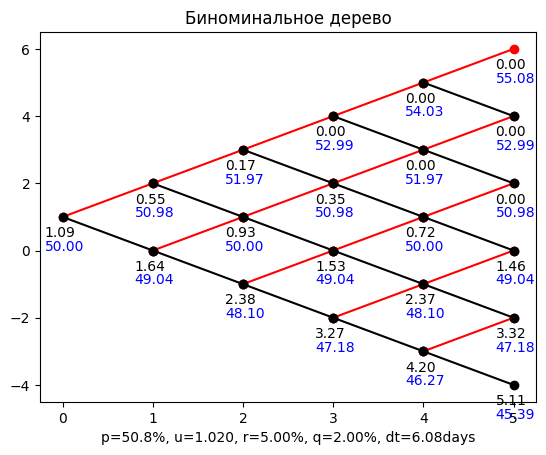

1.0853174417962133

In [ ]:
r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1/12, 5, 50
K = S*1.01
print("Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K-S,0), american=False, showStatePrices=True)

## Задача (дерево)

Задача. Постройте биноминальные деревья для
*   американского опциона колл,
*   американского опциона пут,
*   европейского опциона колл,
*   европейского опциона пут
и сделайте выводы.





Биноминальное дерево, американский опцион колл


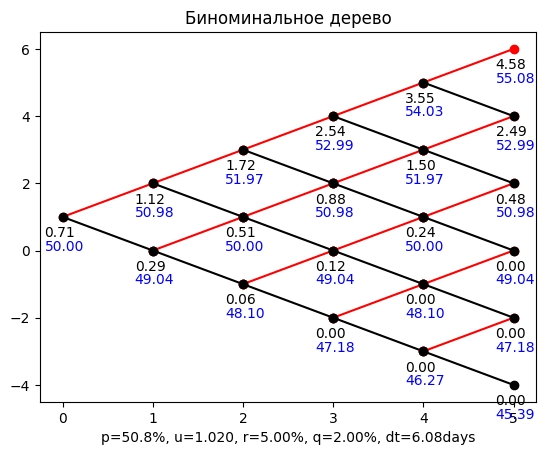

Цена американского опциона колл: 0.7120324211650718
Биноминальное дерево, американский опцион пут


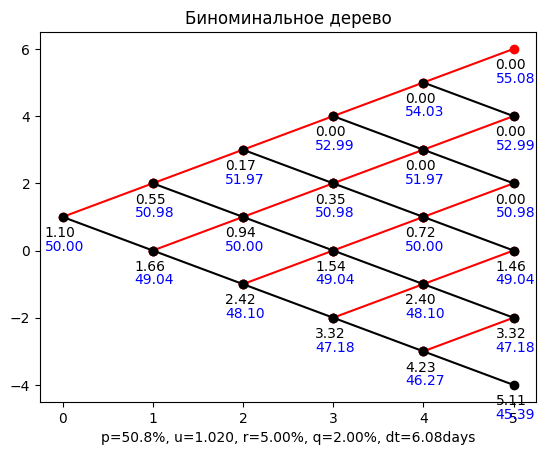

Цена американского опциона пут: 1.0962783164249443
Биноминальное дерево, европейский опцион колл


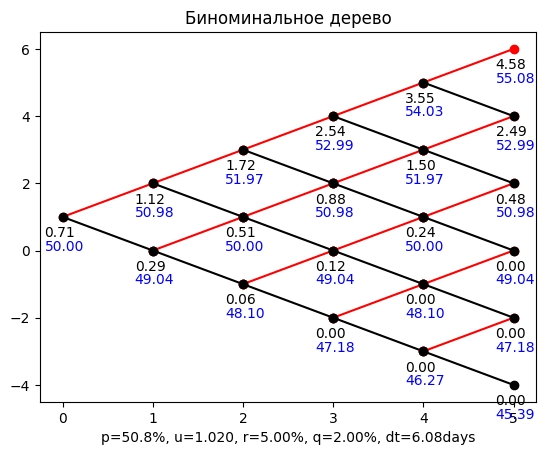

Цена европейского опциона колл: 0.7120324211650718
Биноминальное дерево, европейский опцион пут


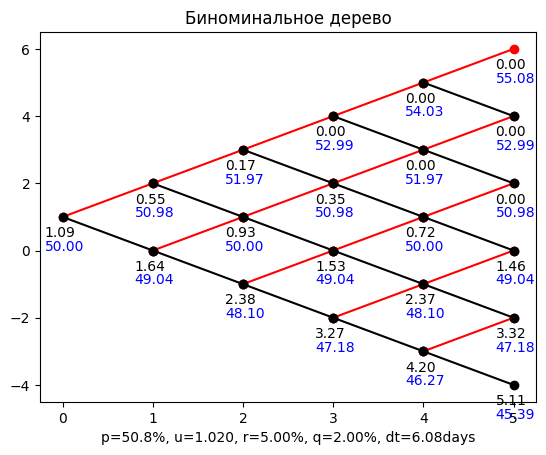

Цена европейского опциона пут: 1.0853174417962133


In [45]:

r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1 / 12, 5, 50
K = S * 1.01  


print("Биноминальное дерево, американский опцион колл")
price_american_call = binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(S - K, 0), american=True, showStatePrices=True)
print("Цена американского опциона колл:", price_american_call)

print("=======================================================================================================================")

print("Биноминальное дерево, американский опцион пут")
price_american_put = binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K - S, 0), american=True, showStatePrices=True)
print("Цена американского опциона пут:", price_american_put)

print("=======================================================================================================================")

print("Биноминальное дерево, европейский опцион колл")
price_european_call = binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(S - K, 0), american=False, showStatePrices=True)
print("Цена европейского опциона колл:", price_european_call)

print("=======================================================================================================================")

print("Биноминальное дерево, европейский опцион пут")
price_european_put = binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K - S, 0), american=False, showStatePrices=True)
print("Цена европейского опциона пут:", price_european_put)


* Американский опцион колл:

    - Цена опциона ($0.71) включает возможность досрочного исполнения, но досрочное исполнение здесь невыгодно из-за отсутствия дивидендов и ожидаемого роста актива.
* Американский опцион пут:

    - Цена опциона ($1.10) выше, чем у европейского пута, так как возможность досрочного исполнения пут опциона имеет большую ценность в условиях снижения цены базового актива.
* Европейский опцион колл:

    - Цена ($0.71) совпадает с американским коллом, так как досрочное исполнение европейского колл опциона невозможно, а отсутствие дивидендов делает досрочное исполнение ненужным для американского опциона.
* Европейский опцион пут:

    - Цена ($1.08) ниже, чем у американского пута, так как европейский опцион не может быть исполнен досрочно, что снижает его ценность при падении цены базового актива.

# Модель Блека-Шоулза

Задача. Допустим, что условия модели Блека-Шоулза выполнены. Текущая цена бездивидентных акций равна 100, волатальность
5%, цена страйк 100, время до экспирации один год, безрисковая
ставка 5%.

Оцените справедливую стоимость опционов колл и пут и вычислите греческие характеристики для опционов как функцию от текущей цены базового актива.

In [62]:
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t

## Задача (оценка и паритет)

In [ ]:
d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))

d2 = d1 - sigma * np.sqrt(T)

def call(S, K, T, r, q, d1, d2):
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp (-r * T) * norm.cdf(d2)


def put(S, K, T, r, q, d1, d2):
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

In [ ]:
# оценка опциона пут с использованием паритета
def put_paritet(S, K, T, r, q):
    return call(S, K, T, r, q, d1, d2) + K * np.exp(-r * T) - S

Сравните результаты оценки опциона пут с/без паритета цен

In [59]:
put_direct = put(S, K, T, r, q, d1, d2)
put_via_parity = put_paritet(S, K, T, r, q)

print(f"Цена опциона пут (прямой расчет): {put_direct:.4f}")
print(f"Цена опциона пут (через паритет): {put_via_parity:.4f}")

Цена опциона пут (прямой расчет): 1.0642
Цена опциона пут (через паритет): 0.9810


In [63]:
params = f"r = {r}, sigma = {sigma}, t = {t}, T = {T}, S0 = {S0}, K = {K}"
print('Параметры:', params)

call_price = call(S0, K, T, r, q, d1,d2)
print('Оценка опциона колл =', call_price)
put_price  =  put(S0, K, T, r, q,d1,d2)
print('Оценка опциона пут =', put_price)

Параметры: r = 0.07, sigma = 0.3, t = 0, T = 1, S0 = 100, K = 100
Оценка опциона колл = 4.675342869294802
Оценка опциона пут = -2.085275140110376


## Задача (греческие характеристики)

Вспомогательные функции для аналитического вычисления греческих характеристик.

In [65]:


def delta(S, K, T, sigma, r, q, option_type="call"):
    d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    if option_type == "call":
        return np.exp(-q * T) * norm.cdf(d1)
    elif option_type == "put":
        return np.exp(-q * T) * (norm.cdf(d1) - 1)

def gamma(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    return np.exp(-q * T) * norm.pdf(d1) / (S * sigma * np.sqrt(T))

def theta(S, K, T, sigma, r, q, option_type="call"):
    d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == "call":
        return (-S * np.exp(-q * T) * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) -
                q * S * np.exp(-q * T) * norm.cdf(d1) +
                r * K * np.exp(-r * T) * norm.cdf(d2))
    elif option_type == "put":
        return (-S * np.exp(-q * T) * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) +
                q * S * np.exp(-q * T) * norm.cdf(-d1) -
                r * K * np.exp(-r * T) * norm.cdf(-d2))

def kappa(S, K, T, sigma, r, q, option_price, option_type="call"):
    return delta(S, K, T, sigma, r, q, option_type) * (S / option_price)

def vega(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    return S * np.exp(-q * T) * norm.pdf(d1) * np.sqrt(T)

def ro(S, K, T, sigma, r, q, option_type="call"):
    d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == "call":
        return K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        return -K * T * np.exp(-r * T) * norm.cdf(-d2)

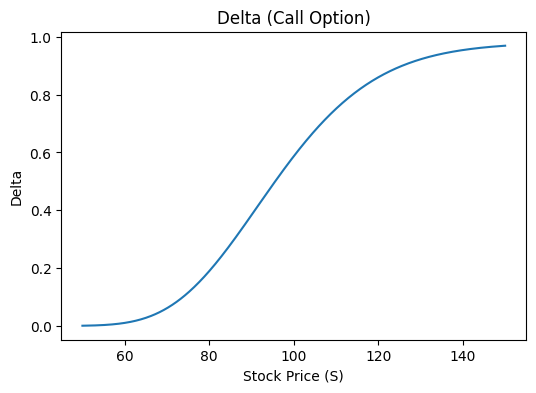

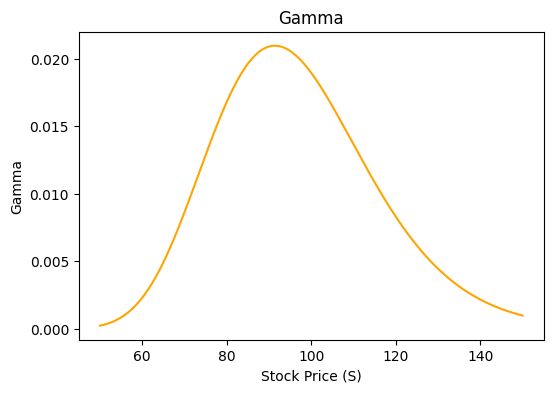

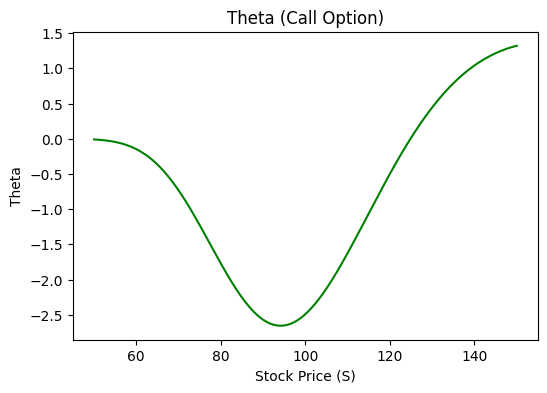

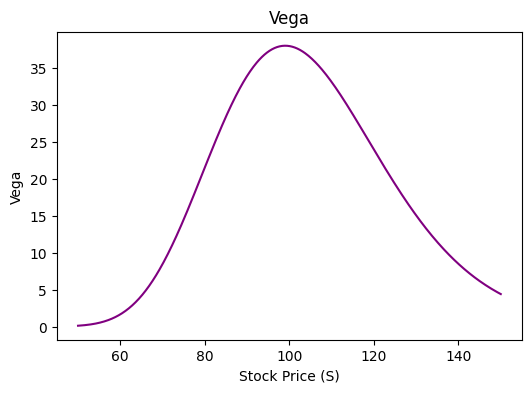

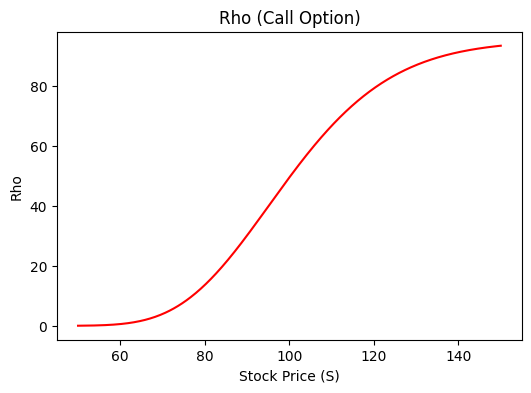

In [96]:
S = np.linspace(50, 150, 500) 
K = 100  
T = 1    
sigma = 0.2  
r = 0.05     
q = 0.02     


delta_call = [delta(s, K, T, sigma, r, q, "call") for s in S]
gamma_values = [gamma(s, K, T, sigma, r, q) for s in S]
theta_call = [theta(s, K, T, sigma, r, q, "call") for s in S]
vega_values = [vega(s, K, T, sigma, r, q) for s in S]
rho_call = [ro(s, K, T, sigma, r, q, "call") for s in S]


plt.figure(figsize=(6, 4))
plt.plot(S, delta_call, label="Delta (Call)")
plt.title("Delta (Call Option)")
plt.xlabel("Stock Price (S)")
plt.ylabel("Delta")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(S, gamma_values, label="Gamma", color="orange")
plt.title("Gamma")
plt.xlabel("Stock Price (S)")
plt.ylabel("Gamma")
plt.show()

# Plot Theta
plt.figure(figsize=(6, 4))
plt.plot(S, theta_call, label="Theta (Call)", color="green")
plt.title("Theta (Call Option)")
plt.xlabel("Stock Price (S)")
plt.ylabel("Theta")
plt.show()

# Plot Vega
plt.figure(figsize=(6, 4))
plt.plot(S, vega_values, label="Vega", color="purple")
plt.title("Vega")
plt.xlabel("Stock Price (S)")
plt.ylabel("Vega")
plt.show()

# Plot Rho
plt.figure(figsize=(6, 4))
plt.plot(S, rho_call, label="Rho (Call)", color="red")
plt.title("Rho (Call Option)")
plt.xlabel("Stock Price (S)")
plt.ylabel("Rho")
plt.show()

Графики зависимости греческих характеристик для опционов от цены базового актива.

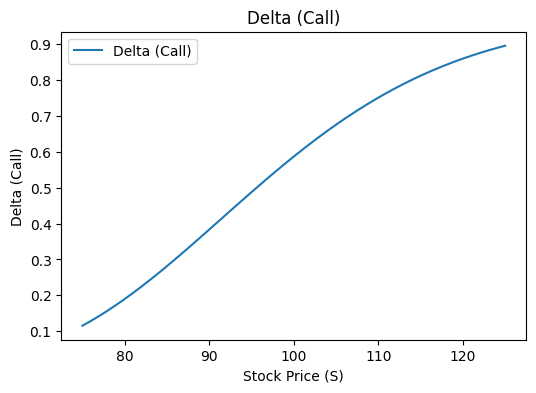

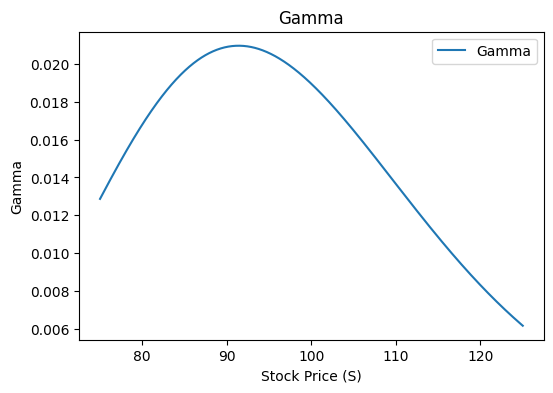

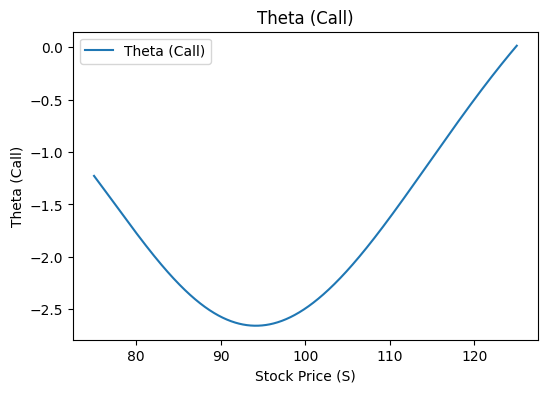

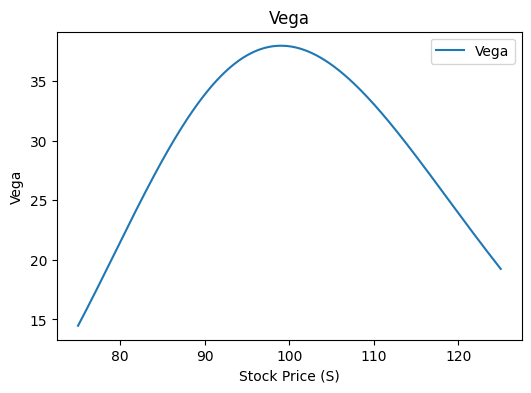

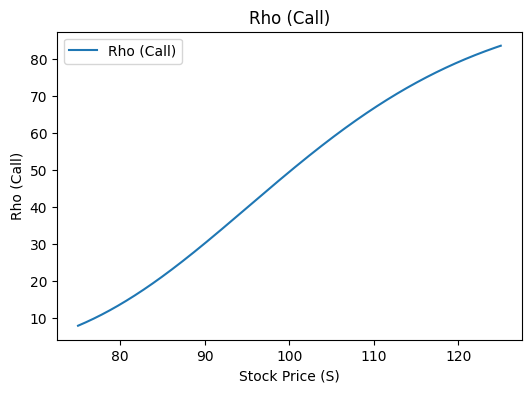

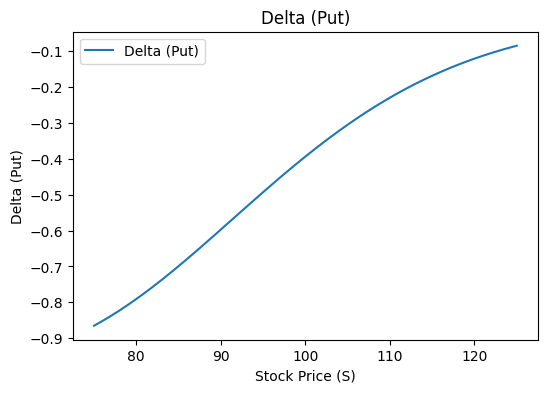

In [97]:
N = 1000
x_data = np.linspace(S0 - S0/4, S0+S0/4, N)
cp_data = np.zeros((6, N))




for i, S in enumerate(x_data):
    cp_data[0, i] = delta(S, K, T, sigma, r, q, "call")  # Delta for call
    cp_data[1, i] = gamma(S, K, T, sigma, r, q)          # Gamma
    cp_data[2, i] = theta(S, K, T, sigma, r, q, "call")  # Theta for call
    cp_data[3, i] = vega(S, K, T, sigma, r, q)           # Vega
    cp_data[4, i] = ro(S, K, T, sigma, r, q, "call")     # Rho for call
    cp_data[5, i] = delta(S, K, T, sigma, r, q, "put")   # Delta for put


greeks = ["Delta (Call)", "Gamma", "Theta (Call)", "Vega", "Rho (Call)", "Delta (Put)"]
for i, greek in enumerate(greeks):
    plt.figure(figsize=(6, 4))
    plt.plot(x_data, cp_data[i, :], label=greek)
    plt.title(greek)
    plt.xlabel("Stock Price (S)")
    plt.ylabel(greek)

    plt.legend()
    plt.show()

Задача. Вычислите греческие коэффициенты численно и сравните результаты.


In [98]:
S = 100
K = 120  
T = 1    
sigma = 0.2  
r = 0.23   
q = 0.02     


In [93]:

def first_derivative(f, x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=0.001):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h * h)
def option_price_s(S):
    d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return call(S, K, T, r, q, d1, d2)

def option_price_sigma(sigma):
    d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return call(S, K, T, r, q, d1, d2)

def option_price_r(r):
    d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return call(S, K, T, r, q, d1, d2)


numerical_delta_fd = first_derivative(option_price_s, S, h=1e-5)
numerical_gamma_fd = second_derivative(option_price_s, S, h=1e-5)
numerical_vega_fd = first_derivative(option_price_sigma, sigma, h=1e-5)
numerical_rho_fd = first_derivative(option_price_r, r, h=1e-5)

numerical_results = pd.DataFrame({
    "Greek": ["Delta (FD)", "Gamma (SD)", "Vega (FD)", "Rho (FD)"],
    "Numerical (Finite Difference)": [numerical_delta_fd, numerical_gamma_fd, numerical_vega_fd, numerical_rho_fd]
})

print(numerical_results)


        Greek  Numerical (Finite Difference)
0  Delta (FD)                       0.582445
1  Gamma (SD)                       0.019043
2   Vega (FD)                      38.008744
3    Rho (FD)                      49.131973


Задача. Постройте график трехмерной поверхности для описания зависимости греческих коэффициентов опциона  
*   кол,
*   пут

от стоимости базового актива и
количества дней до экспирации.

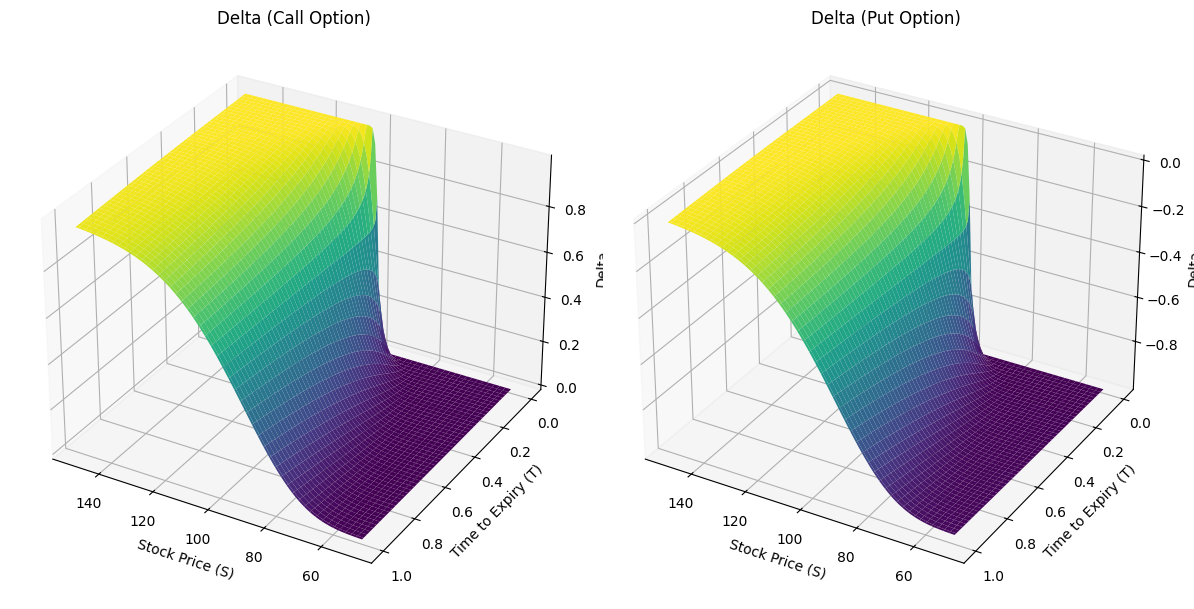

In [ ]:

S_range = np.linspace(50, 150, 100) 
T_range = np.linspace(1/365, 1, 100)  



def d1(S, K, T, sigma, r, q):
    return (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, sigma, r, q):
    return d1(S, K, T, sigma, r, q) - sigma * np.sqrt(T)

def delta_call(S, K, T, sigma, r, q):
    d1_val = d1(S, K, T, sigma, r, q)
    return np.exp(-q * T) * norm.cdf(d1_val)

def delta_put(S, K, T, sigma, r, q):
    d1_val = d1(S, K, T, sigma, r, q)
    return np.exp(-q * T) * (norm.cdf(d1_val) - 1)


S_grid, T_grid = np.meshgrid(S_range, T_range)


delta_call_surface = delta_call(S_grid, K, T_grid, sigma, r, q)
delta_put_surface = delta_put(S_grid, K, T_grid, sigma, r, q)


fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(S_grid, T_grid, delta_call_surface, cmap='viridis')
ax.set_title("Delta (Call Option)")
ax.set_xlabel("Stock Price (S)")
ax.set_ylabel("Time to Expiry (T)")
ax.set_zlabel("Delta")
ax.view_init(30, 120)


ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(S_grid, T_grid, delta_put_surface, cmap='viridis')
ax.set_title("Delta (Put Option)")
ax.set_xlabel("Stock Price (S)")
ax.set_ylabel("Time to Expiry (T)")
ax.set_zlabel("Delta")
ax.view_init(30, 120)

plt.tight_layout()
plt.show()


* Delta (Call Option):

    - При увеличении стоимости базового актива 
        дельта приближается к 


    - При уменьшении времени до экспирации $T→0$, форма кривой становится более выраженной.

* Delta (Put Option):

    - При увеличении стоимости базового актива 
     дельта приближается к 0

    - При уменьшении времени до экспирации $𝑇→0$, дельта опускается ниже, показывая меньшую вероятность исполнения опциона.


* Основные выводы:
    - Чувствительность стоимости опциона к движению базового актива $𝑆$ увеличивается ближе к экспирации.
    - Поведение дельты резко меняется при подходе цены базового актива $𝑆$ к страйку $𝐾$
    - Временной фактор $𝑇$ играет ключевую роль в определении формы зависимости дельты.

# Опционная стратегия

## Задача (по вариантам)

Задача. С использование досок опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) или [MOEX](https://www.moex.com/ru/derivatives/optionsdesk.aspx) выберите ликвидный актив и реализуейте две [опционных стратегий](https://www.option.ru/glossary/strategy),
$i$ и $i+12$, где $i$ -- ваша фамилия по алфавиту:

1.   Покупка опциона колл. Long Call
1. Продажа опциона колл. Short Call
1. Покупка опциона пут. Long Put
1. Продажа опциона пут. Short Put
1. Бычий колл спрэд. Bull Call Spread
1. Бычий пут спрэд. Bull Put Spread
1. Медвежий колл спрэд. Bear Call Spread
1. Медвежий пут спрэд. Bear Put Spread
1. Покупка бабочки. Long Butterfly
1. Продажа бабочки. Short Butterfly
1. Покупка кондора. Long Condor
1. Продажа кондора. Short Condor
1. Покупка стрэддла. Long Straddle
1. Продажа стрэддла. Short Straddle
1. Покупка стрэнгла. Long Strangle
1. Продажа стрэнгла. Short Strangle
1. Пропорциональный колл спрэд. Call Ratio Spread
1. Пропорциональный пут спрэд. Put Ratio Spread
1. Пропорциональный обратный колл спрэд. Call Ratio Backspread
1. Пропорциональный обратный пут спрэд. Put Ratio Backspread
1. Синтетический длинный фьючерс. Synthetic Long Futures
1. Синтетический короткий фьючерс. Synthetic Short Futures
1. Стрэп. Strap
1. Стрип. Strip
1. Обратный бычий спрэд. Bull Backspread
1. Обратный медвежий спрэд. Bear Backspread

Проанализируйте как влияет соотношение  спот цены базового актива $S$ и цены страйк $K$ для

опциона call:

*   $S > K$ -- в деньгах (in the money),   
*   $S = K$ -- около денег (at the money),
*   $S < K$ --  вне денег (out of the money) и

опциона put:
*   $S < K$ -- в деньгах (in the money),
*   $S = K$ -- около денег (at the money),  
*   $S > K$ -- вне денег (out of the money).

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии.

Постройте график функции выплат для каждой опционной стратегии.

In [ ]:
# ваш код

## Задача (оптимальный набор)

Задача. С использование доски опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) найдите оптимальный набор опционных контрактов $$
X=\{X_c, X_p\},$$
где
$$
X_c=\{x_i^c \in
\mathbb{Z}: L\le x_i^c \le U, i \in I\},
$$
$$
X_p=\{x_i^p
\in \mathbb{Z}: L \le x_i^p \le U, i \in I\},
$$
здесь
$x_i^c$, $x_i^p>0$ -- количество опционов колл и пут для покупки, $x_i^c$, $x_i^p<0$ -- для продажи. Если
$x_i^c=0$ или $x_i^p=0$, то $i$-ый контракт
не входит в портфель, $L<0$ и $U>0$ -- нижняя и верхняя границы количества контрактов в портфеле соответственно,
$I=\{1,2, \ldots, n\}$ -- набор индексов.

При разработке стратегии придерживаться следующих преположений
*   покупки и продажи опционов можно осуществлять по ask- и bid-ценам,
*   можно занимать короткие и длинные позиции с учетом ликвидности контракта,
*  стратегия должна иметь защиту от падения и роста цен страйк на $x$\% от стоимости базового актива в момент времени $T$,
*  максимальный убыток стратегии ограничен величиной $\mathcal{L}$, равной $y$% от стоимости базового актива в момент времени $t=0$
*  стратегия имеет начальную стоимость $C(t,X)$, равную $w$ условных единиц капитала.

https://arxiv.org/pdf/1707.02087

In [ ]:
# ваш код